## Input Data

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import warnings

from IPython.display import display
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
# Importing dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes = diabetes.drop_duplicates()
display(diabetes.sample(10))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
137,0,93,60,25,92,28.7,0.532,22,0
225,1,87,78,27,32,34.6,0.101,22,0
154,8,188,78,0,0,47.9,0.137,43,1
631,0,102,78,40,90,34.5,0.238,24,0
526,1,97,64,19,82,18.2,0.299,21,0
734,2,105,75,0,0,23.3,0.560,53,0
644,3,103,72,30,152,27.6,0.730,27,0
198,4,109,64,44,99,34.8,0.905,26,1
27,1,97,66,15,140,23.2,0.487,22,0
473,7,136,90,0,0,29.9,0.210,50,0


In [16]:
pp.ProfileReport(diabetes)

Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,60.0 KiB
Average record size in memory,80.0 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [8]:
print((diabetes[['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


#### Although there's no null values, there are zero values in Glucose, BloodPressure, SkinThickness, Insulin and BMI attributes which is not possible. I choose to mark the zeros as NaN and impute them using mean.

In [10]:
# mark zero values as NaN
diabetes[['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
# fill missing values with mean column values
diabetes.fillna(diabetes.mean(), inplace=True)
# count the number of NaN values in each column
print((diabetes[['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [11]:
x = diabetes[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes.values[:,8:9]
display(x.sample(5))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
38,2,90.0,68.0,42.00000,155.548223,38.2,0.503,27
482,4,85.0,58.0,22.00000,49.000000,27.8,0.306,28
473,7,136.0,90.0,29.15342,155.548223,29.9,0.210,50
661,1,199.0,76.0,43.00000,155.548223,42.9,1.394,22
80,3,113.0,44.0,13.00000,155.548223,22.4,0.140,22


In [12]:
y = y.ravel()

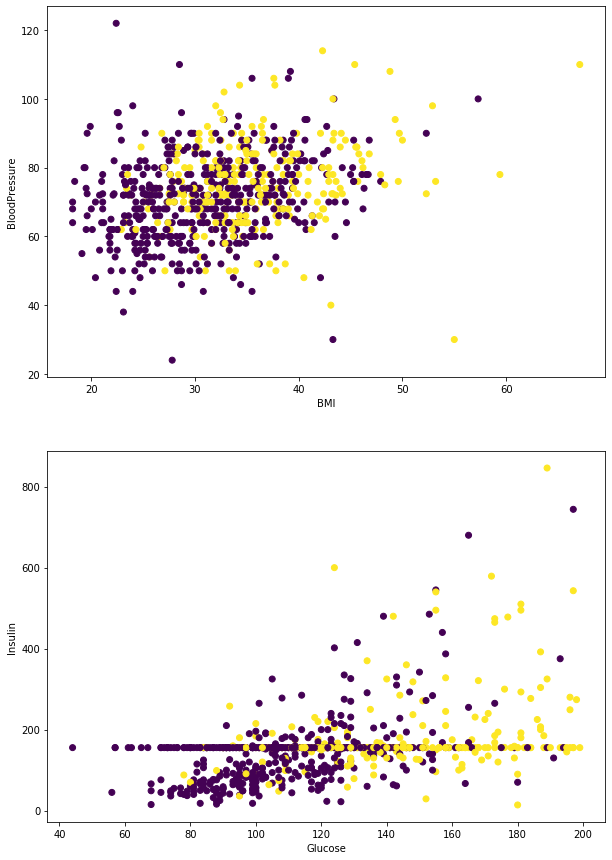

In [13]:
plt.figure(figsize=(10,15))
plt.subplot(211)
plt.scatter(x.BMI, x.BloodPressure, c=y)
plt.xlabel("BMI")
plt.ylabel("BloodPressure")
plt.subplot(212)
plt.scatter(x.Glucose, x.Insulin, c=y)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

## Feature Reduction using PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
cols = ["BMI", "BloodPressure"]
x_pca = pca.fit_transform(x[cols])
x_pca_pd = pd.DataFrame(data=x_pca, columns=['PCA'])

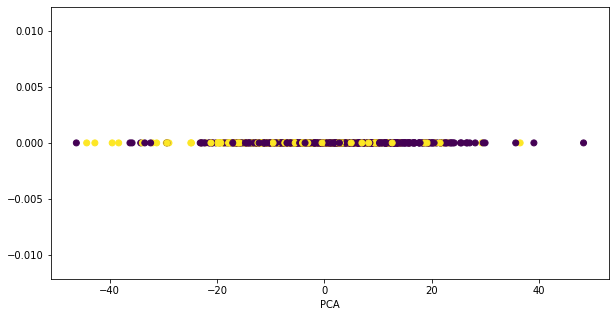

In [15]:
plt.figure(figsize=(10,5))
y_pca = np.zeros(len(x_pca))
plt.scatter(x_pca_pd, y_pca, c=y)
plt.xlabel('PCA')
plt.show()

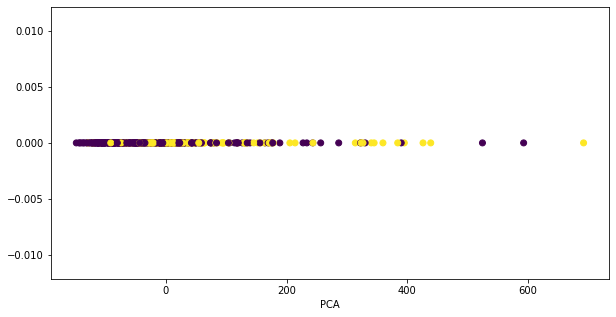

In [16]:
plt.figure(figsize=(10,5))
pca = PCA(n_components=1)
x_pca = pca.fit_transform(x)
x_pca_pd = pd.DataFrame(data=x_pca, columns=['PCA'])
y_pca = np.zeros(len(x_pca))
plt.scatter(x_pca_pd, y_pca, c=y)
plt.xlabel('PCA')
plt.show()

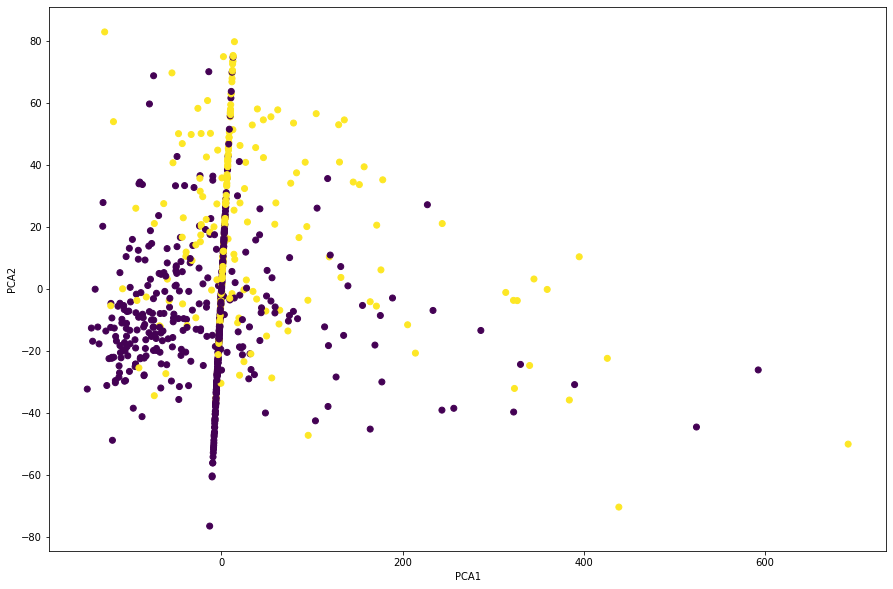

In [17]:
plt.figure(figsize=(15,10))
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca_pd = pd.DataFrame(data=x_pca, columns = ['PCA1', 'PCA2'])
plt.scatter(x_pca_pd.PCA1, x_pca_pd.PCA2, c=y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Feature Reduction using LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
y_ = np.zeros(len(x))
cols = ['BMI', 'BloodPressure']
x_lda = lda.fit(x[cols], y).transform(x[cols])
x_lda_pd = pd.DataFrame(data=x_lda, columns=['LDA'])

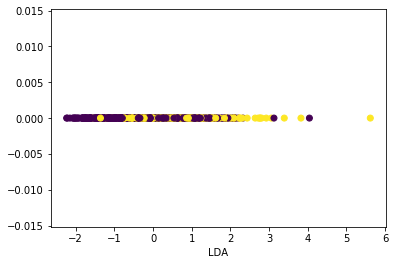

In [19]:
y_lda = np.zeros(len(x_lda))
plt.scatter(x_lda_pd, y_lda, c=y)
plt.xlabel('LDA')
plt.show()

## Feature Reduction using Univariate Feature Selection

In [20]:
from sklearn import preprocessing

x = diabetes[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes[['Outcome']]

x = preprocessing.normalize(x)

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
kBest = SelectKBest(f_classif, k=2)
kBest.fit(x, y) # run the score function on the data

SelectKBest(k=2, score_func=<function f_classif at 0x000001D9A5966840>)

In [22]:
sup = kBest.get_support(True)
print(sup)

[2 5]


## Feature Reduction using Sequential Feature Selection

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

pred_model = GaussianNB()
sfs = SFS(pred_model, k_features=5, forward=True, scoring='accuracy', cv=0)
sfs = sfs.fit(x, y)

In [24]:
sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.65625]),
  'avg_score': 0.65625,
  'feature_names': ('2',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.67838542]),
  'avg_score': 0.6783854166666666,
  'feature_names': ('1', '2')},
 3: {'feature_idx': (1, 2, 7),
  'cv_scores': array([0.69140625]),
  'avg_score': 0.69140625,
  'feature_names': ('1', '2', '7')},
 4: {'feature_idx': (0, 1, 2, 7),
  'cv_scores': array([0.69791667]),
  'avg_score': 0.6979166666666666,
  'feature_names': ('0', '1', '2', '7')},
 5: {'feature_idx': (0, 1, 2, 3, 7),
  'cv_scores': array([0.71223958]),
  'avg_score': 0.7122395833333334,
  'feature_names': ('0', '1', '2', '3', '7')}}

In [25]:
sfs.k_feature_idx_

(0, 1, 2, 3, 7)

In [26]:
sfs.k_score_

0.7122395833333334